In [1]:
import sys
import os

sys.path.append('..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Questão 1**

## **Dados**

In [3]:
data = pd.read_csv('../data/mnist_5.csv', header=None).values
data.shape

(6313, 784)

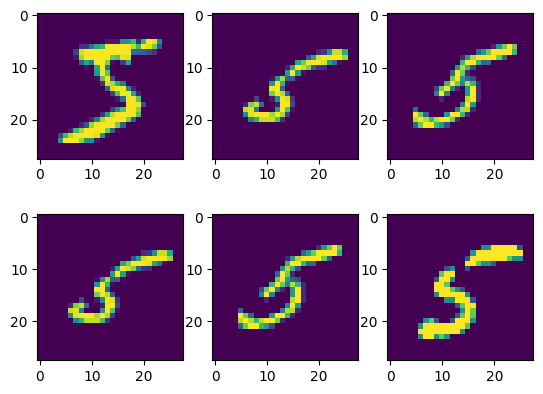

In [4]:
fig, axs = plt.subplots(2, 3)

for i in range(2):
    for j in range(3):
        example = data[i+j].reshape(28, 28)
        axs[i][j].imshow(example)

## **Modelo**

In [5]:
from amaprob.models.probabilistic_pca import PPCA

In [6]:
def plot_sample(m, ax):
    sample = m.sample()
    sample = sample.reshape(28, 28)
    ax.imshow(sample)

In [33]:
def get_reconstruction(m, d):
    ld = m.project(d)
    rd = m.reconstruct(ld)
    return rd

In [34]:
model = PPCA(data, 2)
model.fit()

### **Reconstrução e Geração**

In [8]:
latent_dims = [2, 10, 20]

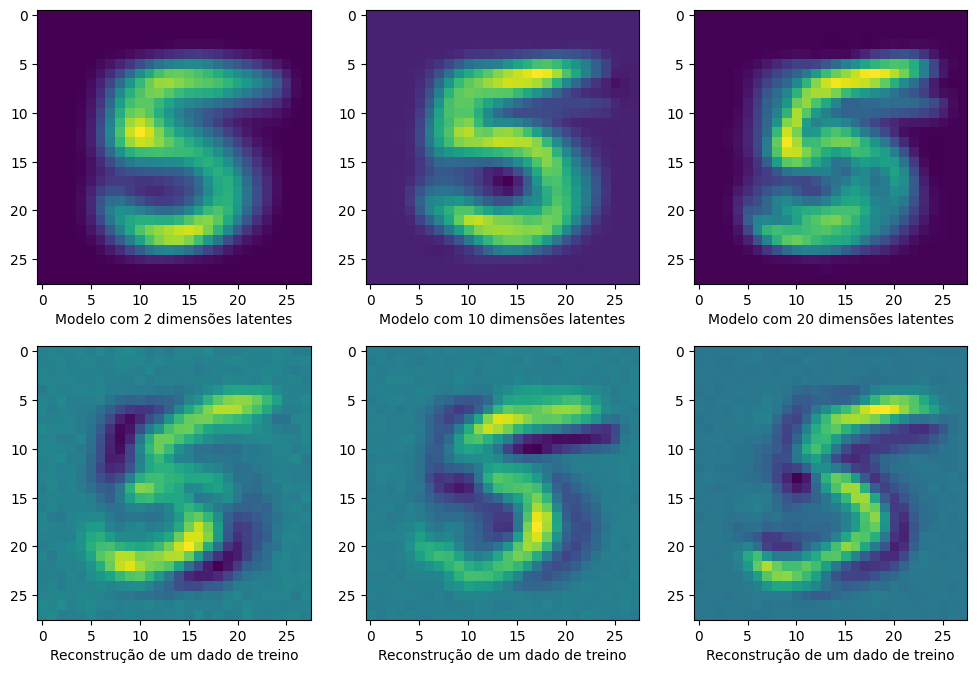

In [38]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i in range(len(latent_dims)):
    model = PPCA(data, latent_dims[i])
    model.fit()
    plot_sample(model, axs[0][i])
    axs[0][i].set_xlabel(f'Modelo com {latent_dims[i]} dimensões latentes')
    reconstruction = get_reconstruction(model, data[0]).reshape(28, 28)
    axs[1][i].imshow(reconstruction)
    axs[1][i].set_xlabel('Reconstrução de um dado de treino')

Text(0.5, 1.0, 'Dado original antes da reconstrução')

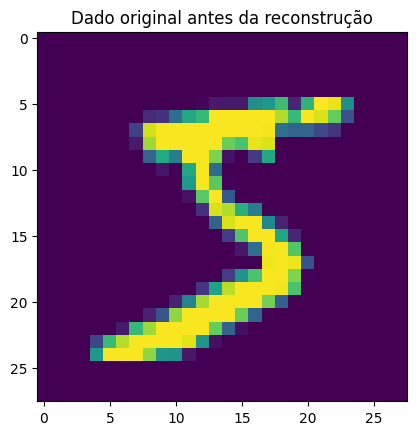

In [40]:
plt.imshow(data[0].reshape(28, 28))
plt.title('Dado original antes da reconstrução')

# **Questão 2**